# Check PC SFs

**Goal:** Bill asked me some follow-up Qs on the little local test that I ran, so I'm going to check this out.

19th Mar 2021

In [126]:
import pandas as pd
import numpy as np
from itertools import product
from glob import glob 

import matplotlib.pyplot as plt
from matplotlib import gridspec

import uproot

# Let's do ATLAS style plots too!
import os
os.sys.path += ["../PyATLASstyle/"]

import matplotlib as mpl
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


**Where I was running:** ~/gpfs/futzingAround/XhhCommon

(a recursive clone from master $18^{th}$ Mar 2021)

**Command I used to run:**

`submit.sh --mode local --nonresonant --mc ../datasets/sm_mc16d.txt > out.txt`

In [3]:
f = uproot.open('../../futzingAround/XhhCommon/run/XhhCommon-sm_mc16d-full_nonres-21.2.163.MAR21-NR-0/data-MiniNTuple/mc16_13TeV.600043.PhH7EG_PDF4LHC15_HHbbbb_cHHH01d0.deriv.DAOD_EXOT8.e7954_s3126_r10201_p4089.root')

In [4]:
t = f['XhhMiniNtuple']

In [107]:
for k in t.keys():
    if 'Continuous' in k.decode():
        
        print(k)

b'resolvedJets_Quantile_DL1r_Continuous'
b'resolvedJets_SF_DL1r_Continuous'
b'resolvedJets_InefficiencySF_DL1r_Continuous'


In [108]:
sf_lol = t.array('resolvedJets_SF_DL1r_Continuous',flatten=True)

pt = t.array('resolvedJets_pt',flatten=True)
raw_pt = t.array('resolvedJets_rawPt',flatten=True)

quantile = t.array('resolvedJets_Quantile_DL1r_Continuous',flatten=True)

flav = t.array('resolvedJets_HadronConeExclTruthLabelID',flatten=True)

In [93]:
jcols = [f'resolvedJets_{v}' for v in ['pt','rawPt','HadronConeExclTruthLabelID']]
t.pandas.df(jcols)

resolvedJets_pt  resolvedJets_rawPt  \
entry subentry                                        
0     0              219.273697          223.722458   
      1              125.809647          126.491928   
      2              108.390022          108.390022   
      3               38.220768           35.054752   
1     0              177.026642          179.586121   
...                         ...                 ...   
721   0              135.492203            0.000000   
      1              112.707283            0.000000   
      2               50.923843            0.000000   
      3               49.265327            0.000000   
      4               48.990543            0.000000   

                resolvedJets_HadronConeExclTruthLabelID  
entry subentry                                           
0     0                                               5  
      1                                               5  
      2                                               0  
      3                                               5  
1     0                                               5  
...                                                 ...  
721   0                                               5  
      1                                               5  
      2                                               5  
      3                                               5  
      4                                               0  

[4020 rows x 3 columns]

In [41]:
for k in t.keys():
    if 'Had' in k.decode():
        print(k)

b'resolvedJets_HadronConeExclTruthLabelID'
b'resolvedJets_HadronConeExclExtendedTruthLabelID'


In [100]:
sf = np.array([sfi[0] for sfs in sf_lol for sfi in sfs])

Text(0, 0.5, 'Unwieghted entries')

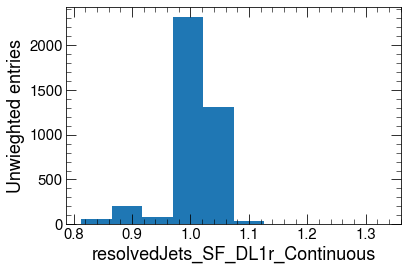

In [102]:
plt.hist(sf)

plt.xlabel('resolvedJets_SF_DL1r_Continuous',fontsize=18)
plt.ylabel('Unwieghted entries',fontsize=18)

Text(0, 0.5, 'Unwieghted entries')

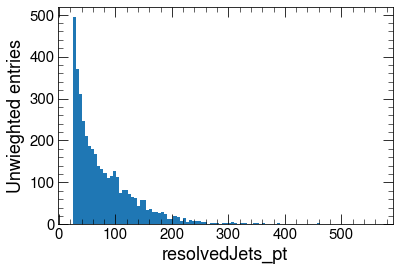

In [63]:
plt.hist(pt,100)
plt.xlabel('resolvedJets_pt',fontsize=18)
plt.ylabel('Unwieghted entries',fontsize=18)

(0.683558162418107, 2949.2735378483953)

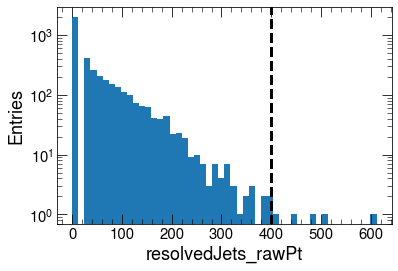

In [40]:
plt.hist(raw_pt,50,log=True)
plt.xlabel('resolvedJets_rawPt',fontsize=18)
plt.ylabel('Unwieghted entries',fontsize=18)

ylim = plt.ylim()
plt.plot([400]*2,ylim,'k--')
plt.ylim(ylim)

(0.6992067282709052, 1833.5063839707407)

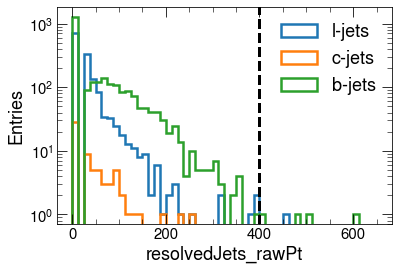

In [53]:
for i,pdg,l in zip(range(3),[0,4,5],['l','c','b']):
    
    plt.hist(raw_pt[flav==pdg],52,(0,650),histtype='step',lw=2.5,
             label=f'{l}-jets',log=True)

    
plt.xlabel('resolvedJets_rawPt',fontsize=18)
plt.ylabel('Entries',fontsize=18)
plt.legend(fontsize=18)

ylim = plt.ylim()
plt.plot([400]*2,ylim,'k--')
plt.ylim(ylim)


From the plot, this looks like four $b$-jets, and one $l$-jet.

In [58]:
flavToColor = { 0: 'blue',
                4: 'red',
                5: 'green'}

flavToLabel = { 0: 'l',
                4: 'c',
                5: 'b'}

In [110]:
for i,pti in enumerate(raw_pt):

    fi = flav[i]
    ci = flavToColor[fi]
    li = flavToLabel[fi]
    sfi = sf[i]
    qi = quantile[i]
    
    if pti > 400:
        print(colored(f'{li}-jet: raw pT = {pti:.1f} GeV, Q{qi}, SF = {sfi}', ci))

l-jet: raw pT = 451.7 GeV, Q1, SF = 0.9980457425117493
b-jet: raw pT = 611.5 GeV, Q4, SF = 1.0671478509902954
b-jet: raw pT = 507.8 GeV, Q5, SF = 1.1012731790542603
b-jet: raw pT = 486.2 GeV, Q1, SF = 0.9148672819137573
b-jet: raw pT = 409.9 GeV, Q5, SF = 1.1012731790542603


Rafael said it was v *odd* that the $l$-jet SFs is so small and the $b$-jet ones are so big.

My first guess was that it was grabbing the nominal values for the highest calibrated jet $p_T$ bin, but maybe it's *flipped*??


**Check the CDI file**

In [127]:
cdi = uproot.open('../data/2020-21-13TeV-MC16-CDI-2020-12-02_v2.root')

In [128]:
cdi.keys()

[b'VersionInfo;1', b'DL1;1', b'DL1r;1', b'DL1rmu;1', b'MV2c10;1']

In [129]:
dl1r = cdi['DL1r']

In [131]:
dl1r.keys()

[b'AntiKt4EMPFlowJets_BTagging201903;1',
 b'AntiKtVR30Rmax4Rmin02TrackJets_BTagging201903;1']

In [136]:
cts = dl1r['AntiKt4EMPFlowJets_BTagging201903']['Continuous']
cts.keys()

[b'T;1', b'C;1', b'Light;1', b'B;1']

In [137]:
pc_b = cts['B']
pc_l = cts['Light']

In [140]:
for k in pc_b.keys():
    print(k,pc_b[k])

b'410250_CalibrationBinned_Eff;1' <Undefined_Analysis_3a3a_CalibrationDataHistogramContainer at 0x7f3323775590>
b'410250_Eff;1' <Undefined_Analysis_3a3a_CalibrationDataHistogramContainer at 0x7f33237822d0>
b'410464_CalibrationBinned_Eff;1' <Undefined_Analysis_3a3a_CalibrationDataHistogramContainer at 0x7f3323782150>
b'410464_Eff;1' <Undefined_Analysis_3a3a_CalibrationDataHistogramContainer at 0x7f3323782210>
b'410470_CalibrationBinned_Eff;1' <Undefined_Analysis_3a3a_CalibrationDataHistogramContainer at 0x7f3323775f50>
b'410470_Eff;1' <Undefined_Analysis_3a3a_CalibrationDataHistogramContainer at 0x7f3323782190>
b'410558_CalibrationBinned_Eff;1' <Undefined_Analysis_3a3a_CalibrationDataHistogramContainer at 0x7f3323782250>
b'410558_Eff;1' <Undefined_Analysis_3a3a_CalibrationDataHistogramContainer at 0x7f3323782150>
b'411233_CalibrationBinned_Eff;1' <Undefined_Analysis_3a3a_CalibrationDataHistogramContainer at 0x7f3323782050>
b'411233_Eff;1' <Undefined_Analysis_3a3a_CalibrationDataHistogra

In [147]:
sf_b = pc_b['default_SF']

In [148]:
sf_b.

Ok, cool, I'm pretty happy w/ this rn.

Before submitting an XhhCommon merge request, let's j make sure we now have the Quantiles for the PC mode.

In [111]:
f_min = uproot.open('../../futzingAround/XhhCommon/run/XhhCommon-sm_mc16d-min_nonres-21.2.163.MAR21-NR-0/data-MiniNTuple/mc16_13TeV.600043.PhH7EG_PDF4LHC15_HHbbbb_cHHH01d0.deriv.DAOD_EXOT8.e7954_s3126_r10201_p4089.root')

t_min = f_min['XhhMiniNtuple']


In [112]:
for k in t_min.keys():
    print(k)

b'runNumber'
b'eventNumber'
b'lumiBlock'
b'coreFlags'
b'bcid'
b'mcEventNumber'
b'mcChannelNumber'
b'mcEventWeight'
b'NPV'
b'actualInteractionsPerCrossing'
b'averageInteractionsPerCrossing'
b'weight_pileup'
b'correctedAverageMu'
b'correctedAndScaledAverageMu'
b'correctedActualMu'
b'correctedAndScaledActualMu'
b'weight_pileup_up'
b'weight_pileup_down'
b'rand_run_nr'
b'rand_lumiblock_nr'
b'passedTriggerHashes'
b'matchedTriggerHashes'
b'nresolvedJets'
b'resolvedJets_E'
b'resolvedJets_pt'
b'resolvedJets_phi'
b'resolvedJets_eta'
b'resolvedJets_is_DL1r_FixedCutBEff_77'
b'resolvedJets_SF_DL1r_FixedCutBEff_77'
b'resolvedJets_Quantile_DL1r_Continuous'
b'resolvedJets_SF_DL1r_Continuous'
b'resolvedJets_InefficiencySF_DL1r_Continuous'
b'nmuon'
b'muon_m'
b'muon_pt'
b'muon_phi'
b'muon_eta'
b'muon_charge'
b'muon_isIsolated_FCTight'
b'muon_EnergyLoss'
b'muon_EnergyLossSigma'
b'muon_energyLossType'
b'muon_MeasEnergyLoss'
b'muon_MeasEnergyLossSigma'
b'muon_ParamEnergyLoss'
b'muon_ParamEnergyLossSigmaMinu

In [113]:
t_min.array('resolvedJets_Quantile_DL1r_Continuous')

<JaggedArray [[5 5 1 5] [5 1 5 5 1 1] [5 5 1 ... 1 -1 -1] ... [1 2 5 5] [5 5 1 2 -1 5] [5 1 -1 5 -1 5]] at 0x7f3323be9450>

In [114]:
t_min.array('resolvedJets_SF_DL1r_Continuous')

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return cls.numpy.array(value, copy=False)


<ObjectArray [[[0.9702857], [1.0291388], [0.998587], [1.0507367]] [[0.9702857], [0.90352046], [1.0284443], [1.0584621], [0.9992243], [0.9992243]] [[1.0291388], [1.0284443], [1.000082], [1.000082], [1.0284443], [1.0584621], [0.9992243], [0.9992243], [0.9992243]] ... [[0.99804574], [1.0316563], [1.1012732], [1.0584621]] [[0.99667084], [0.99667084], [0.9992243], [0.98743373], [0.9992243], [1.0507367]] [[0.99667084], [1.000082], [0.9934419], [0.99667084], [1.000082], [1.0507367]]] at 0x7f3323676dd0>

Finally - let's verify I didn't fuck up the systematics!

In [115]:
f_sys = uproot.open('../../futzingAround/XhhCommon/run/XhhCommon-sm_mc16d-min_nonres_sys-21.2.163.MAR21-NR-0/data-MiniNTuple/mc16_13TeV.600043.PhH7EG_PDF4LHC15_HHbbbb_cHHH01d0.deriv.DAOD_EXOT8.e7954_s3126_r10201_p4089.root')

In [116]:
for k in f_sys.keys():
    print(k)

b'XhhMiniNtuple;1'
b'XhhMiniNtupleResolved_JET_BJES_Response__1up;1'
b'XhhMiniNtupleResolved_JET_BJES_Response__1down;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Detector1__1up;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Detector1__1down;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Detector2__1up;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Detector2__1down;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Mixed1__1up;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Mixed1__1down;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Mixed2__1up;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Mixed2__1down;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Mixed3__1up;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Mixed3__1down;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Modelling1__1up;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Modelling1__1down;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Modelling2__1up;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Modelling2__1down;1'
b'XhhMiniNtupleResolved_JET_EffectiveNP_Modelling3__1up;1'
b'XhhMin

In [117]:
t_sys = f_sys['XhhMiniNtuple']

In [118]:
for k in t_sys.keys():
    print(k)

b'runNumber'
b'eventNumber'
b'lumiBlock'
b'coreFlags'
b'bcid'
b'mcEventNumber'
b'mcChannelNumber'
b'mcEventWeight'
b'NPV'
b'actualInteractionsPerCrossing'
b'averageInteractionsPerCrossing'
b'weight_pileup'
b'correctedAverageMu'
b'correctedAndScaledAverageMu'
b'correctedActualMu'
b'correctedAndScaledActualMu'
b'weight_pileup_up'
b'weight_pileup_down'
b'rand_run_nr'
b'rand_lumiblock_nr'
b'passedTriggerHashes'
b'matchedTriggerHashes'
b'nresolvedJets'
b'resolvedJets_E'
b'resolvedJets_pt'
b'resolvedJets_phi'
b'resolvedJets_eta'
b'resolvedJets_is_DL1r_FixedCutBEff_77'
b'resolvedJets_SF_DL1r_FixedCutBEff_77'
b'resolvedJets_Quantile_DL1r_Continuous'
b'resolvedJets_SF_DL1r_Continuous'
b'resolvedJets_InefficiencySF_DL1r_Continuous'
b'nmuon'
b'muon_m'
b'muon_pt'
b'muon_phi'
b'muon_eta'
b'muon_charge'
b'muon_isIsolated_FCTight'
b'muon_EnergyLoss'
b'muon_EnergyLossSigma'
b'muon_energyLossType'
b'muon_MeasEnergyLoss'
b'muon_MeasEnergyLossSigma'
b'muon_ParamEnergyLoss'
b'muon_ParamEnergyLossSigmaMinu

In [119]:
t_sys.array(b'resolvedJets_Quantile_DL1r_Continuous')

<JaggedArray [[5 5 1 5] [5 1 5 5 1 1] [5 5 1 ... 1 -1 -1] ... [1 2 5 5] [5 5 1 2 -1 5] [5 1 -1 5 -1 5]] at 0x7f33245001d0>

In [121]:
t_sys.array(b'resolvedJets_pt')

<JaggedArray [[219.2737 125.80965 108.39002 38.220768] [177.02664 117.83077 74.70139 50.61367 37.102962 33.825558] [163.86105 82.46385 79.97763 ... 40.459904 29.77437 27.327953] ... [398.97025 359.1895 343.99304 50.63288] [101.58159 101.41012 41.28324 40.050163 38.15341 33.46187] [103.08498 97.17021 97.11107 93.08096 80.482185 51.856777]] at 0x7f33244fa850>

In [122]:
t_sys.array(b'resolvedJets_SF_DL1r_Continuous')

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return cls.numpy.array(value, copy=False)


<ObjectArray [[[1.0], [], [], []] [[1.0], [], [], [], [], []] [[1.0], [], [], [], [], [], [], [], []] ... [[1.0], [], [], []] [[1.0], [], [], [], [], []] [[1.0], [], [], [], [], []]] at 0x7f33244ebc50>

In [124]:
t_sys.array(b'resolvedJets_SF_DL1r_FixedCutBEff_77')

<ObjectArray [[[1.0154464, 1.0190398, 1.0118532, 1.0274183, 1.0034746, 1.0166914, 1.0142015, 1.0138805, 1.0170125, 1.0146348, 1.016258, 1.0152968, 1.0155962, 1.0154464, 1.0154464, 1.01545, 1.015443, 1.0154462, 1.0154468, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464, 1.0154464], [1.0143114, 1.0195291, 1.0090939, 1.022858, 1.0057648, 1.0105286, 1.0180944, 1.0116336, 1.0169892, 1.0144213, 1.0142016, 1.0145036, 1.0141193, 1.0143162, 1.0143067, 1.0143075, 1.0143155, 1.0143116, 1.0143113, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114, 1.0143114], [0.99938554, 0.99938554, 0.99938554, 0.99938554, 0.99938554, 0.99938554, 0.99938554, 0.99938554, 0.99938554, 0.99938554, 0.99938